In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import annotate
import n_1rxi as method
import plot_utils

In [2]:
chunk_size = 50

In [3]:
fname = method.__file__.split('/')[-1][:-3].replace('x', str(chunk_size))
fname

'n_1r50i'

In [4]:
import rate
rate.setkey(1)

In [5]:
source = annotate.get_clean()

In [6]:
source = source.sample(frac=1, random_state=8)

In [7]:
await method.rate(source, chunk_size=chunk_size)

Request 1 of 90
Request 2 of 90
Request 3 of 90
Request 4 of 90
Request 5 of 90
Request 6 of 90
Request 7 of 90
Request 8 of 90
Request 9 of 90
Request 10 of 90
Request 11 of 90
Request 12 of 90
Request 13 of 90
Request 14 of 90
Request 15 of 90
Request 16 of 90
Request 17 of 90
Request 18 of 90
Request 19 of 90
Request 20 of 90
Request 21 of 90
Request 22 of 90
Request 23 of 90
Request 24 of 90
Request 25 of 90
Request 26 of 90
Request 27 of 90
Request 28 of 90
Request 29 of 90
Request 30 of 90
Request 31 of 90
Request 32 of 90
Request 33 of 90
Request 34 of 90
Request 35 of 90
Request 36 of 90
Request 37 of 90
Failed parse (chunk 0). Prompt:
'''We aim to evaluate the creativity of ideas in an Alternative Uses Tests (AUT) based on specific criteria. Please rate our ideas, given below, in terms of their Novelty, which is defined as follows:
Novelty: Rate the novelty of the idea on a scale of 1 to 100, with 1 being not novel at all and 100 being extremely novel. Consider how unique, ori

In [8]:
source.to_excel(f'gpt-ratings/{fname}-turbo.xlsx')

In [9]:
source = pd.read_excel(f'gpt-ratings/{fname}-turbo.xlsx').set_index('Unnamed: 0')

In [10]:
corr = {key: stats.spearmanr(source[[key.capitalize(), key]]) for key in annotate.measures}
corr

{'novelty': SignificanceResult(statistic=0.5578368972012572, pvalue=7.163357178719392e-101),
 'feasibility': SignificanceResult(statistic=0.5948290227055469, pvalue=7.918310544395815e-118),
 'value': SignificanceResult(statistic=0.18160282835740674, pvalue=1.604832713890343e-10)}

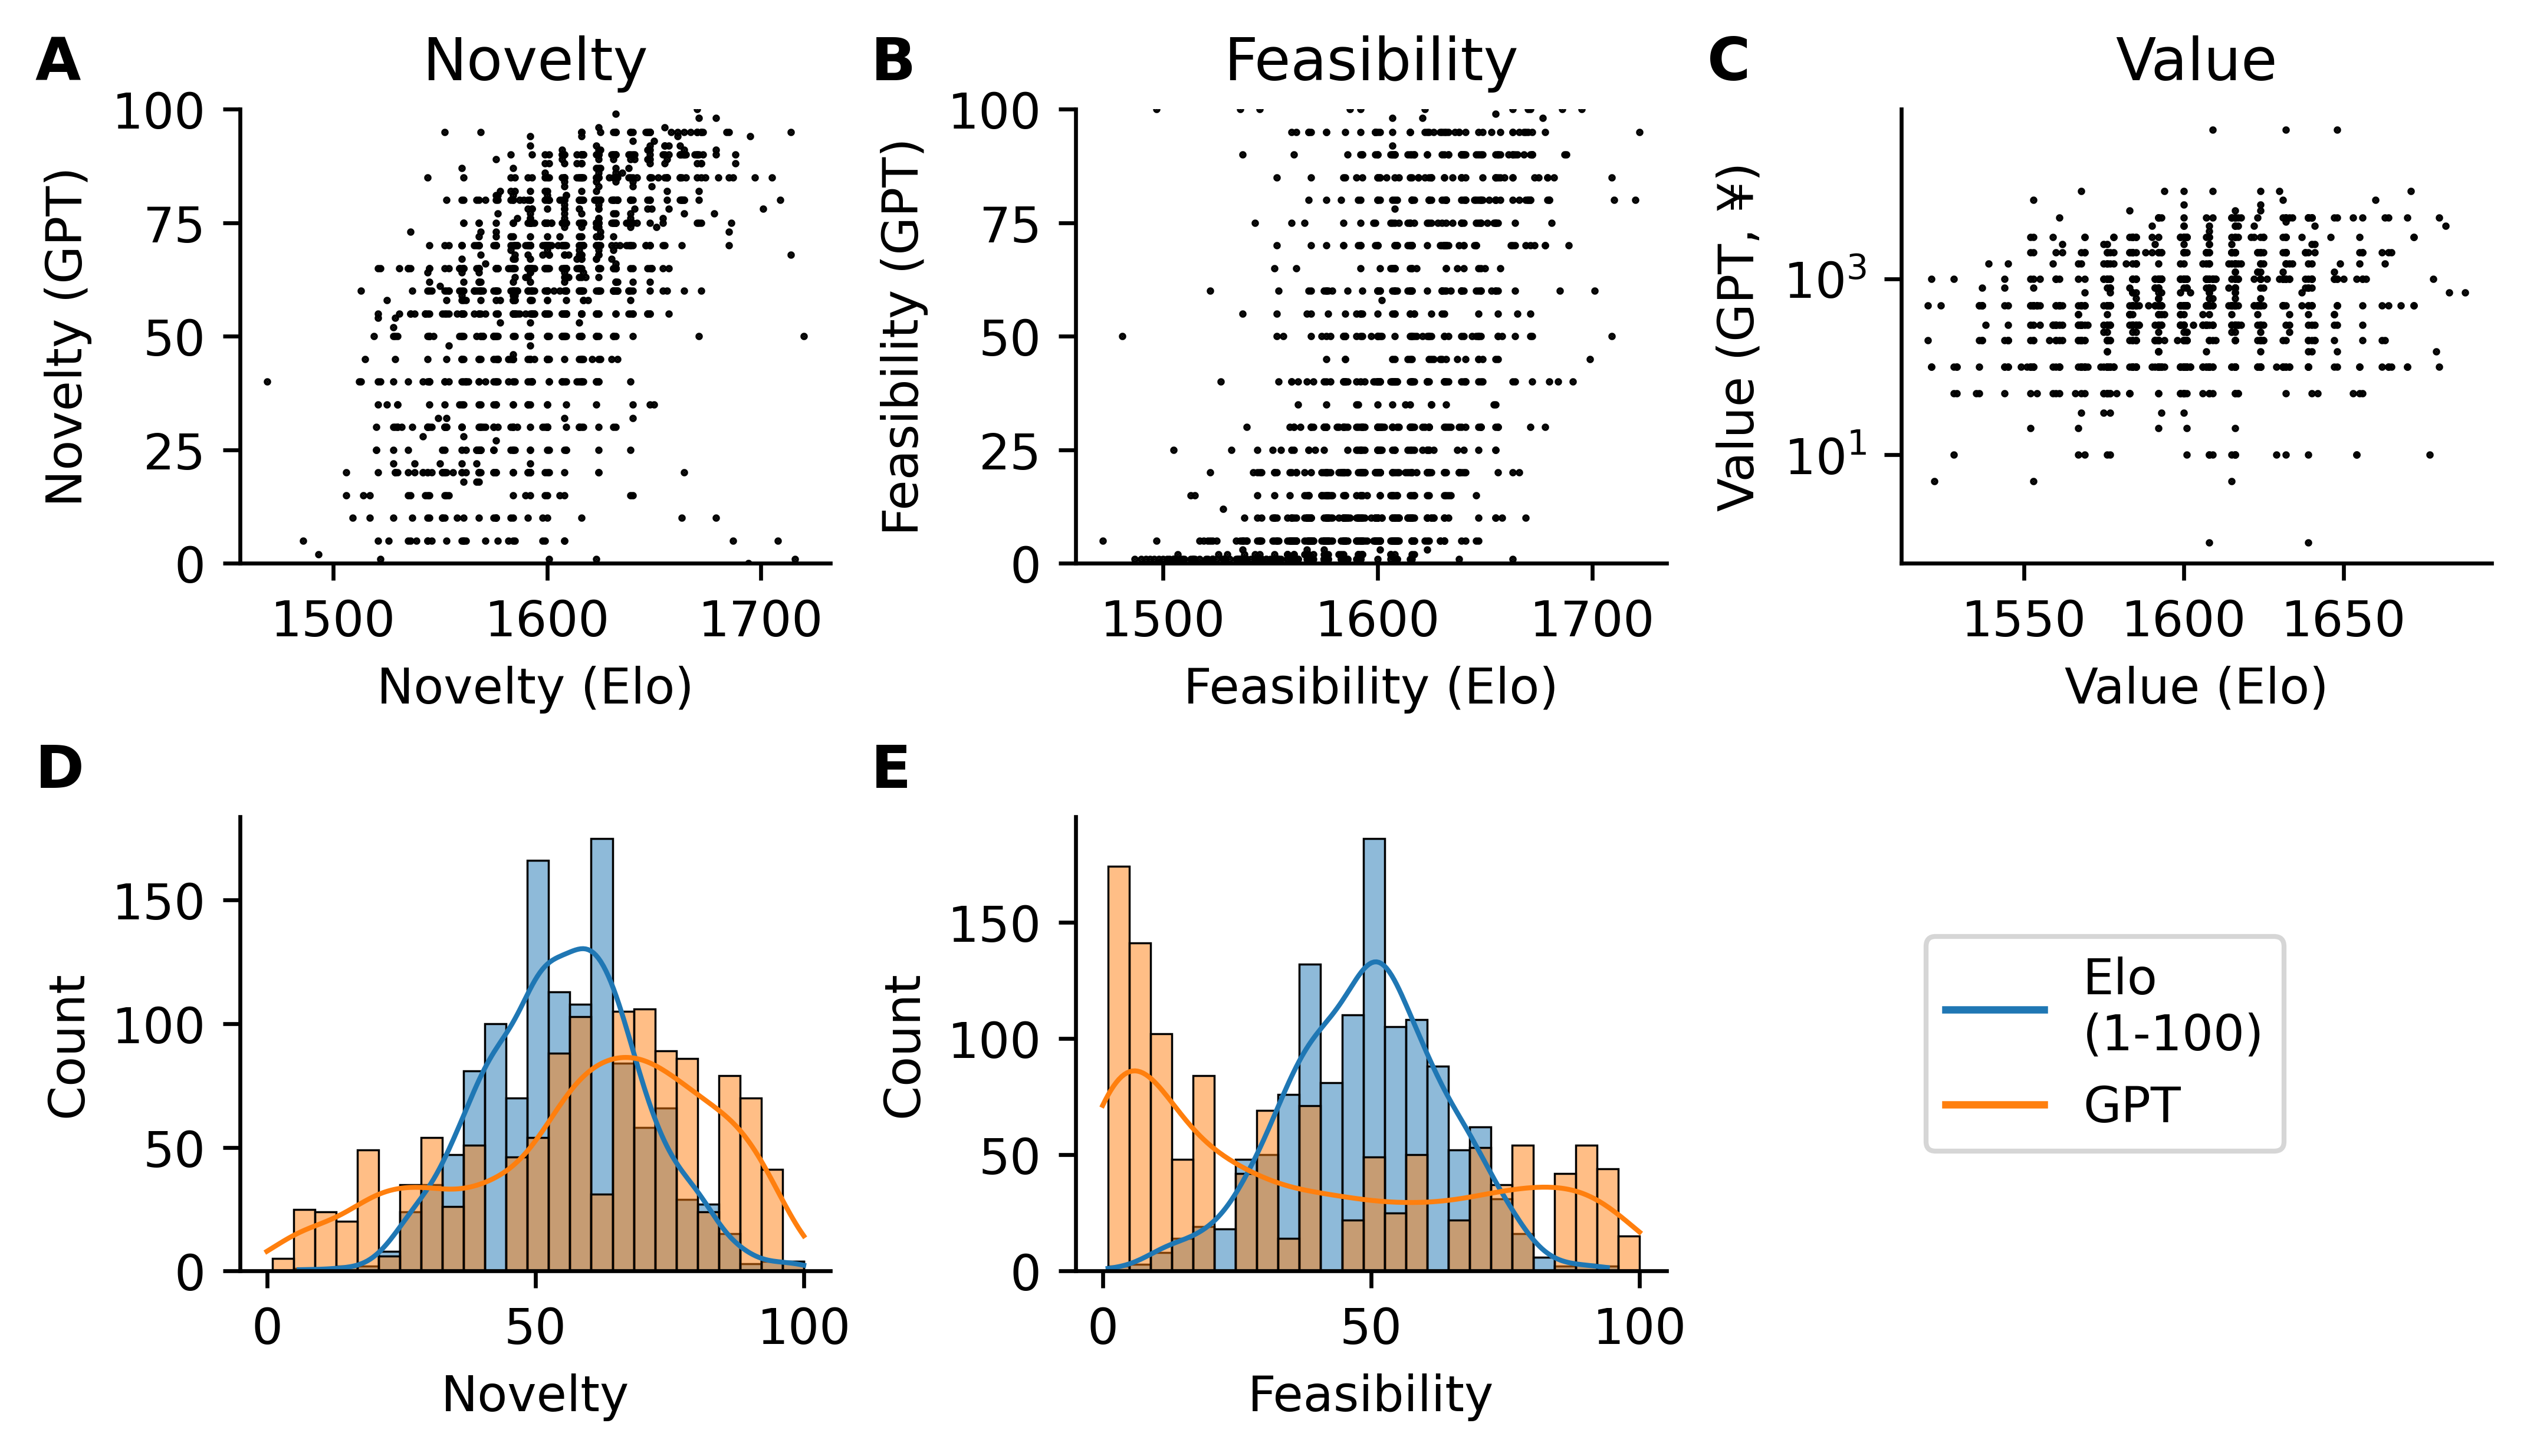

In [11]:
fig, axs = plt.subplots(2, 3, figsize=(7,4), layout='constrained', dpi=600)
for measure, ax in zip(annotate.measures, axs.T):
    Measure = measure.capitalize()
    if measure == 'value':
        mask = (source['value']>0) & (source['value']<100000)
        suffix = ', ¥'
        ax[0].semilogy(source[mask][Measure], source[mask][measure], 'ok', ms=.5)
    else:
        suffix = ''
        ax[0].plot(source[Measure], source[measure], 'ok', ms=.5)
    ax[0].set_xlabel(f'{Measure} (Elo)')
    ax[0].set_ylabel(f'{Measure} (GPT{suffix})')
    ax[0].set_title(Measure)
    if measure != 'value':
        ax[0].set_ylim(0,100)

    if measure != 'value':
        sns.histplot(source, x=f'{measure}_transformed', ax=ax[1], kde=True, bins=25, binrange=(1,100), line_kws={'lw':1})
        sns.histplot(source, x=measure, ax=ax[1], kde=True, bins=25, binrange=(1,100), line_kws={'lw':1})
        ax[1].set_xlabel(Measure)

axs[1,2].plot([], label='Elo\n(1-100)')
axs[1,2].plot([], label='GPT')
axs[1,2].legend(loc='center left')
axs[1,2].set_xticks([])
axs[1,2].set_yticks([])

sns.despine()
sns.despine(ax=axs[1,2], bottom=True, left=True)

for i, ax in enumerate(axs.flatten()):
    if i < 5:
        plot_utils.label_panel(ax, i)

# plt.savefig(f'Figure_2.{fname}.pdf')

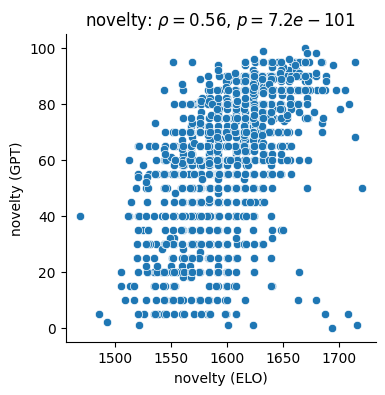

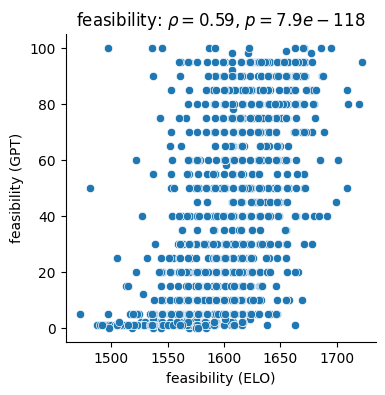

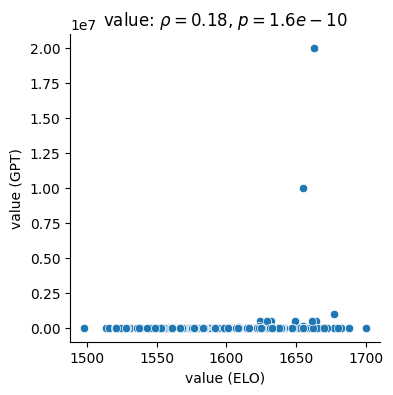

In [12]:
for key, c in corr.items():
    plt.figure(figsize=(4,4))
    sns.scatterplot(source, x=key.capitalize(), y=key)
    sns.despine()
    plt.xlabel(f'{key} (ELO)')
    plt.ylabel(f'{key} (GPT)')
    plt.title(f'{key}: $\\rho = {c.statistic:.2g}$, $p = {c.pvalue:.2g}$')

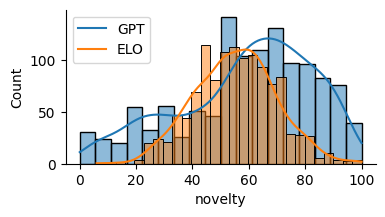

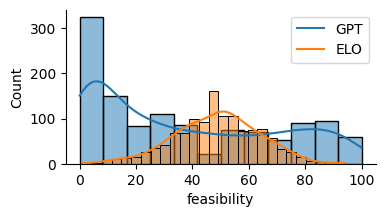

In [13]:
for key in ('novelty', 'feasibility'):
    fig, ax = plt.subplots(figsize=(4,2))
    sns.histplot(source, x=key, ax=ax, kde=True)
    sns.histplot(source, x=f'{key}_transformed', ax=ax, kde=True)
    sns.despine()
    plt.plot([], label='GPT')
    plt.plot([], label='ELO')
    plt.legend()

In [14]:
for idx, row in source[source['value']<0].iterrows():
    print(row['Question'], row['Answer'], row['value_explanation'], sep='\n', end='\n\n')

In [15]:
for idx, row in source[source['value'] > 100000].iterrows():
    print(row['Question'], row['Answer'], row['value'], row['value_idea_explanation'], row['value_explanation'], sep='\n', end='\n\n')

塩
絵画
500000
1. 塩を使った絵画
塩を使ったアート作品はユニークであり、アート作品の価値は幅広いが、一般的に数万円から数百万円の範囲。

塩
絵
500000
16. 塩を絵として使用
塩を使ったアート作品はユニークであり、市場価値はあるが、アイテム1と同様に評価される。

コルク
家の建築
500000
20. コルクを使った家の建築
エコフレンドリーな建築材料としてのコルクは、持続可能な住宅市場で高い価値がある。

レンガ
教室
10000000
18. レンガを教室として使用
レンガを使った教室の建設は実用的で、市場価値は高い。

ビニール袋
熱気球
1000000
9. ビニール袋を熱気球として使用するアイデア
熱気球は非常に高価で、数百万円以上の価値がある。

レンガ
家
20000000
28. レンガを家として使用
レンガを使った家の建設は実用的で、市場価値は非常に高い。

レンガ
階段
500000
37. レンガを階段として使用
レンガを使った階段は実用的で、市場価値は高い。

レンガ
トイレ
500000
42. レンガをトイレとして使用
レンガを使ったトイレの建設は実用的で、市場価値は高い。

コルク
住居
500000
40. コルクを使った住居
エコフレンドリーな建築材料としてのコルクは、持続可能な住宅市場で高い価値がある。



Text(0.5, 1.0, 'value: $\\rho = 0.22$, $p = 3.6e-12$')

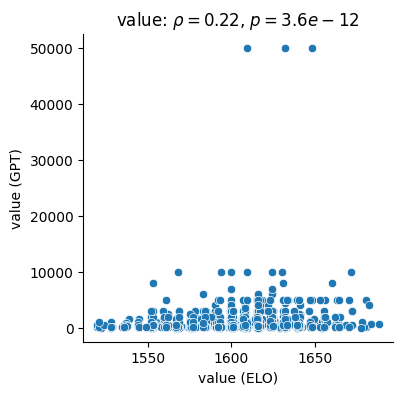

In [16]:
mask = (source['value']>0) & (source['value']<100000)
vcorr = stats.spearmanr(source[mask][['Value', 'value']])
plt.figure(figsize=(4,4))
sns.scatterplot(source[mask], x='Value', y='value')
sns.despine()
plt.xlabel(f'value (ELO)')
plt.ylabel(f'value (GPT)')
plt.title(f'value: $\\rho = {vcorr.statistic:.2g}$, $p = {vcorr.pvalue:.2g}$')

In [17]:
print(source[(source['Question']=='ボールペン')*(source['Answer']=='冷蔵庫')]['novelty_raw'].item())

23. As a refrigerator
The idea of using a pen as a miniature refrigerator, perhaps in a dollhouse setting, is extremely imaginative.
{"novelty":85}
